In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [16]:
np.random.seed(42)
X,y = make_circles(n_samples =500,factor=0.1,noise=0.35,random_state=42)

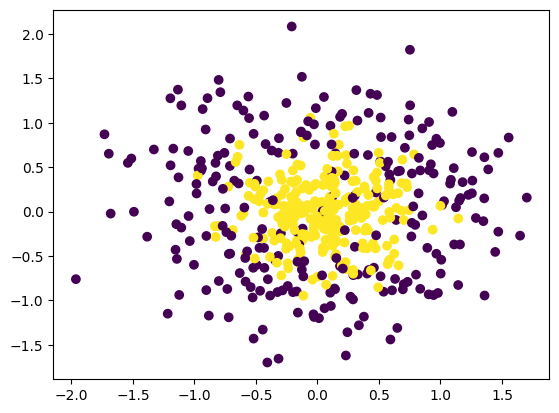

In [17]:
plt.scatter(X[:,:1],X[:,1],c=y)

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

In [20]:
abc = AdaBoostClassifier()
np.mean(cross_val_score(abc,X,y,scoring="accuracy",cv=10))

0.786

In [21]:
abc.fit(X,y)

AdaBoostClassifier()

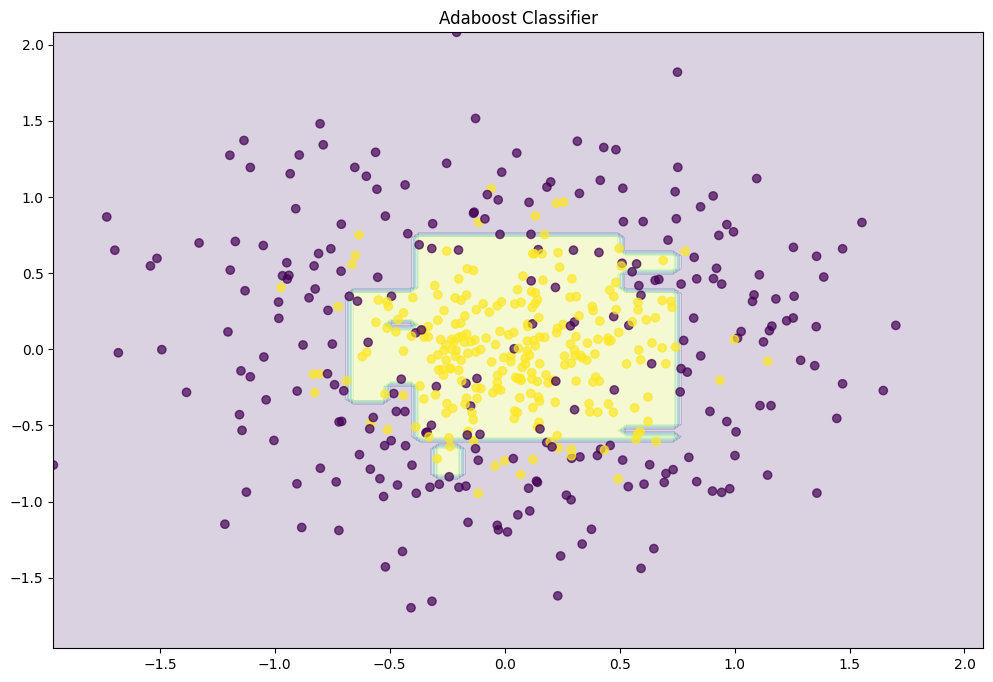

In [24]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

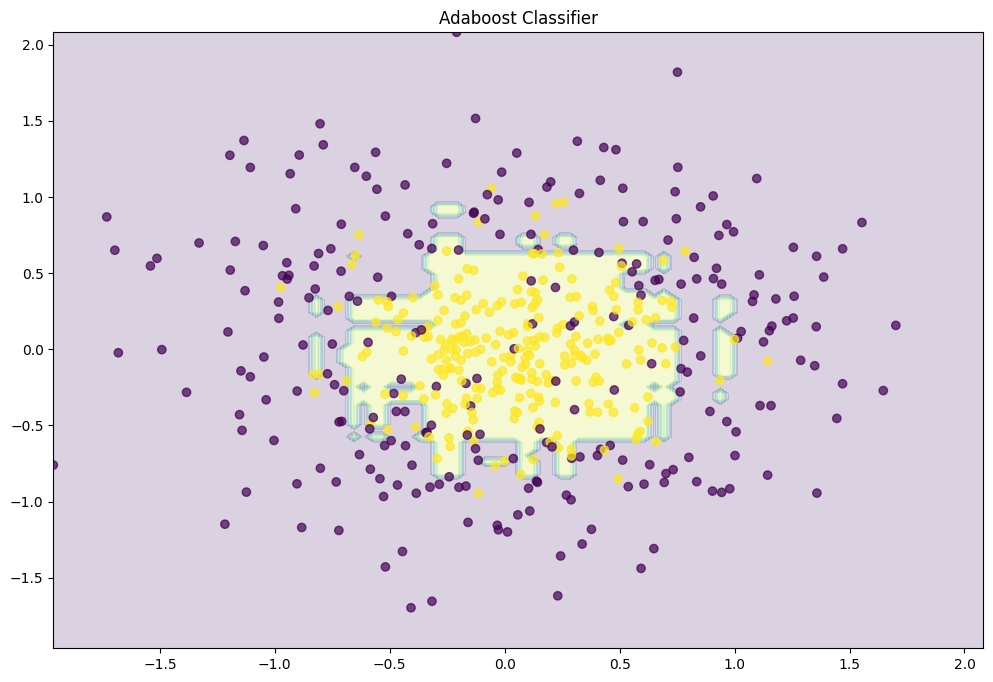

In [27]:
abc1 = AdaBoostClassifier(n_estimators=3500,learning_rate=0.1)
abc1.fit(X,y)
plot_decision_boundary(abc1)

<h3>GridSearchCV</h3>

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
grid_param={
    "n_estimators":[100,200,300,500],
    "learning_rate":[0.0001,0.001,0.01,0.1],
    "algorithm":["SAMME","SAMME.R"]
}
grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid_param,cv = 10,n_jobs=-1,scoring="accuracy")

In [32]:
grid_search.fit(X,y)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy')

In [33]:
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}

In [34]:
grid_search.best_score_

0.8320000000000001